# SIMULACIÓN | LABORATORIO 4


## Generación de número pseudo-aleatorios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display
import ipywidgets as widgets
import random
#%matplotlib notebook

### El módulo Random de python 


**Ejercicio 1:**
- Defina lo que es una semilla y para qué sirve
- use random.random() para generar números aleatorios. 
- use una semilla con random.seed(semilla), y vuelva a ejecutar random.random()
- ¿qué ocurre si vuelve a definir la misma semilla y ejecutar random.random()?

Una semilla es el valor inicial al que se le aplicará recurrentemente una función para ir obteniendo números pseudo-aleatorios. Sirve para darle un punto de partida a la generación de números pseudo-aleatorios. Se supone que debe ser distinta cada vez que se inicia una secuencia, ya que si la semilla es igual a la utilizada en una secuencia anterior, los términos de las secuencias serán los mismos.

In [2]:
random.seed(None) # default: se usa el reloj del sistema como seed 

u = [] # arreglo que contendrá los números aleatorios

for i in range(5):
    u_sub_i = random.random() # genera el siguiente número en la secuencia
    u.append(u_sub_i)

print(u)

[0.7435288695017863, 0.4582404685734466, 0.19244989532039014, 0.7513208679289989, 0.925529701589268]


In [3]:
random.seed(420)
u1 = []

for i in range(5):
    u1.append(random.random())
    
# generamos otro arreglo volviendo a definir la misma semilla

random.seed(420)
u2 = []

for i in range(5):
    u2.append(random.random())

print(u1)
print(u2)
print(np.array_equiv(u1, u2))

[0.026343380459525556, 0.7813690555430765, 0.2726063832840899, 0.09559240016295012, 0.6636843135795658]
[0.026343380459525556, 0.7813690555430765, 0.2726063832840899, 0.09559240016295012, 0.6636843135795658]
True


Vemos que si definimos la misma semilla, los términos generados son los mismos.

**Ejercicio 2:**
Pruebe las funciones y defina sus diferencias:

    - random.randint(a, b)
    - random.randrange(a, b)
    - random.uniform(a, b)
    

In [4]:
a = 5
b = 10

n = 20 # largo de los arreglos a generar

r1 = [random.randint(a, b) for i in range(n)]
r2 = [random.randrange(a, b) for i in range(n)]
r3 = [random.uniform(a, b) for i in range(n)]

In [5]:
print(r1)

[10, 5, 5, 9, 7, 8, 10, 5, 9, 6, 9, 7, 8, 7, 5, 7, 7, 6, 10, 5]


In [6]:
print(r2)

[7, 8, 6, 8, 5, 6, 8, 5, 8, 9, 5, 9, 5, 5, 9, 9, 6, 9, 6, 7]


In [7]:
print(r3)

[5.699895491000159, 5.043661549828499, 6.361096342656204, 5.599955336029585, 8.53129882454485, 5.0853276879739235, 9.816350497124155, 9.540271788441675, 7.60114331498575, 6.967546144943989, 7.33799627677147, 6.028084142238877, 7.183397616460307, 8.787088138112642, 9.780555853483856, 8.138125596620046, 7.26118920192236, 5.92631801952733, 9.876024898532222, 7.313186580987082]


`randint` y `randrange` generan solo números enteros. `uniform` genera números de punto flotante.

A simple vista, notamos que en el caso de `randint`, `b` es un posible valor a generar, mientras que en randrange, no es posible generar `b`, sino que todos los números generados son menor estricto que b. `a` es posible en ambas funciones.

Además, viendo la documentación, notamos que randrange nos permite definir "saltos" en nuestro espacio muestral (por ejemplo, que solo sea posible generar números pares)

### Clase NotSoRandom:

In [8]:
class NotSoRandom(object):
    def seed(self, a=3):
        """Seed the world's most mysterious random number generator."""
        self.seedval = a
    def random(self):
        """Look, random numbers!"""
        self.seedval = (self.seedval * 3) % 19
        return self.seedval

_inst = NotSoRandom()
seed = _inst.seed
random = _inst.random


**Ejercicio 3:**
- use la semilla 1234 y genere números aleatorios hasta que se cumpla un ciclo completo. ¿Cuál resultó ser el periodo?
- Intente con otra semilla y busque completar un ciclo. 

In [9]:
_inst.seed(1234)

valores = []
repeticion_ciclo = False
i = 0

while (not repeticion_ciclo):
    valores.append(_inst.random())
    i = i + 1
    
    if (i%2 == 0): # si hay número par de valores
        mitad_1 = valores[:(i//2)]
        mitad_2 = valores[(i//2):]
        repeticion_ciclo = mitad_1 == mitad_2 # chequear si las 2 mitades son iguales
        if (repeticion_ciclo):
            print(mitad_1, mitad_2, "Ambas mitades son iguales")
            
print("Periodo: ", i//2)

[16, 10, 11, 14, 4, 12, 17, 13, 1, 3, 9, 8, 5, 15, 7, 2, 6, 18] [16, 10, 11, 14, 4, 12, 17, 13, 1, 3, 9, 8, 5, 15, 7, 2, 6, 18] Ambas mitades son iguales
Periodo:  18


In [10]:
_inst.seed(871239)


valores = []
repeticion_ciclo = False
i = 0

while (not repeticion_ciclo):
    valores.append(_inst.random())
    i = i + 1
    
    if (i%2 == 0): # si hay número par de valores
        mitad_1 = valores[:(i//2)]
        mitad_2 = valores[(i//2):]
        repeticion_ciclo = mitad_1 == mitad_2 # chequear si las 2 mitades son iguales
        if (repeticion_ciclo):
            print(mitad_1, mitad_2, "Ambas mitades son iguales")
            
print("Periodo: ", i//2)

[1, 3, 9, 8, 5, 15, 7, 2, 6, 18, 16, 10, 11, 14, 4, 12, 17, 13] [1, 3, 9, 8, 5, 15, 7, 2, 6, 18, 16, 10, 11, 14, 4, 12, 17, 13] Ambas mitades son iguales
Periodo:  18


El periodo es el mismo para ambas semillas.

#### **Ejercicio 4:**
En este ejercicio vamos a comparar el generador de la biblioteca Random de Python con el generador de números pseudo-aleatorios congruencial lineal descrito en la sesión téórica. Para ello se pide lo siguiente:
1. Programe el generador de números pseudo-aleatorios congruencial lineal 
2. Extraiga secuencias del generador programado y del predefinido en Python, grafique en histogramas, compare y concluya.


In [11]:
# Modificación de la clase NotSoRandom
class LinCongruential(object):
    def __init__(self, A, C, M):
        self.A = A
        self.C = C
        self.M = M
    def seed(self, a=3):
        self.seedval = a
    def random(self):
        self.seedval = (A* self.seedval + C) % M
        return self.seedval

In [12]:
import random as rand
A = 41
C = 43
M = 47 #boundaries
gen = LinCongruential(A, C, M)
gen.seed(140)
u = []
v = []

for i in range(2000):
    u.append(gen.random())
    v.append(rand.randint(0, 46))

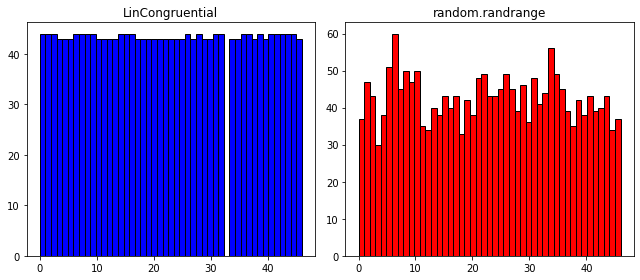

In [13]:
# Histogramas
fig, (ax, bx) = plt.subplots(1, 2, figsize=(9, 4), tight_layout=True)

ax.hist(u, color = 'blue', edgecolor = 'black', bins = 47)
ax.set_title("LinCongruential")

bx.hist(v, color = 'red', edgecolor = 'black', bins = 47)
bx.set_title("random.randrange")

plt.show()

En el caso de nuestro generador "LinCongruential" hay un valor que nunca ocurre, ya que el ciclo acaba sin haber generado este valor, luego se repite el ciclo con los mismos números del ciclo anterior. 
Como conclusión, podemos decir que el periodo de un ciclo no necesariamente es igual a M, sino que puede ser menor, especialmente, si no se eligen bien los parámetros A, C y M. 


El generador de Python presenta una mayor variabilidad en las frecuencias con que se genera cada número, sin embargo, no hay ciclos perceptibles. Además, un mismo número puede salir varias veces sin que eso implique el fin del ciclo. Por ejemplo, es posible que ocurra la secuencia 4, 10, 4, 6,... Dicho en otras palabras, cada elemento de la secuencia no depende únicamente de su predecesor. 

#### **Ejercicio 5:**
Escoja una distribución de probabilidad continua.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2) utilizando el test de k-s

### Utilizando la distribución exponencial

In [60]:
# Tamaño muestras
m = 100000

# Lamda
lmd = 1.0

# Genera secuencia con scipy
expNumsA = scipy.stats.expon.rvs(loc=0, scale=1.0/lmd, size=m, random_state=None)

# CDF exponencial inversa
def expInv(y,lamd):
    return np.log(-y+1)/(-lamd)

# Genera secuencia de forma manual 
expNumsB = [expInv(rand.uniform(0, 1),lmd) for i in range(m)]

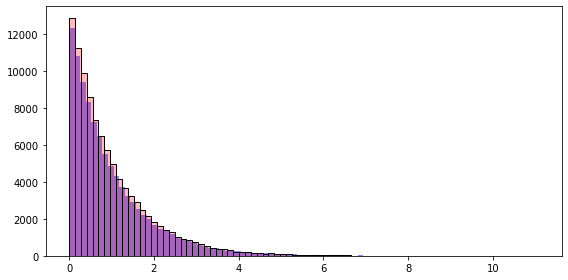

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), tight_layout=True)
ax.hist(expNumsB, color = '#0000FF77', bins = 80)
ax.hist(expNumsA, color = '#FF000044', edgecolor = 'black', bins = 80)
print()

In [62]:
# Realizamos el test ks
print(scipy.stats.kstest(expNumsA,expNumsB))

KstestResult(statistic=0.0023400000000000087, pvalue=0.9465052646604004)


Vemos que la máxima distancia es muy pequeña y el p-value bastante alto, por lo que inferimos que ambas muestras provienen de distribuciones similares, lo cual se respalda aún más visualizando los histogramas.

#### **Ejercicio 6:**
Escoja una distribución de probabilidad discreta.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2). ¿Qué test sería adecuado utilizar en este caso?

### Utilizando una distribución Bernoulli

In [63]:
# Probabilidad
p = 0.4

# Generamos secuencia con scipy
berNumsA = scipy.stats.bernoulli.rvs(p, size=m)

# CDF inversa bernoulli
def berRandom(y,p):
    if y > p:
        return 0
    else:
        return 1
    
# Generamos secuencia manualmente
berNumsB = [berRandom(rand.uniform(0, 1),p) for i in range(m)]

(array([60041., 39959.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

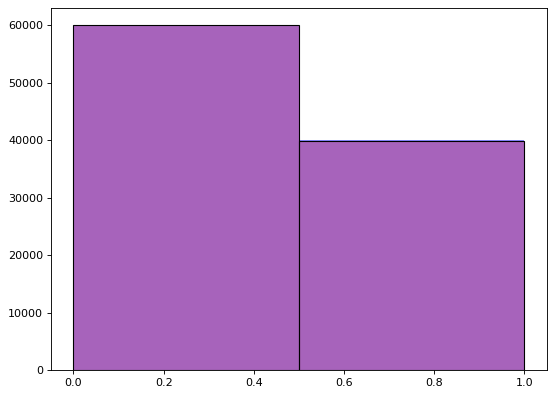

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=80)
ax.hist(berNumsB, color = '#0000FF77', bins = 2)
ax.hist(berNumsA, color = '#FF000044', edgecolor = 'black', bins = 2)

De los histogramas podemos notar que ambas muestras se distibuyen pácticamente igual. Respecto a la prueba, pese a que el test de ks no es utilizado para comparar una muestra con distribuciones teóricas discretas, en este caso si es de utilidad ya que estamos comparando dos muestras.

In [68]:
# Realizamos el test ks
print(scipy.stats.kstest(berNumsA,berNumsB))

KstestResult(statistic=0.00024000000000001798, pvalue=1.0)


Nuevamente los resultados de la prueba refuerzan lo observado en los histogramas, con un p-value igual a 1 no rechazamos la hipótesis nula (que las muestras provengan de la misma distribución).

**Referencias:**
    
- Generating Random Data in Python (Guide): https://realpython.com/python-random/

- Generación de números pseudo-aleatorios: https://www.youtube.com/watch?v=C82JyCmtKWg